In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data_path = "/Users/surajmathapati/Prep/Fraud Detection/data/processed_data/final_data.csv"
data = pd.read_csv(data_path)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


In [9]:
X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Training set shape:  (454904, 29)
Test set shape:  (113726, 29)


In [4]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

In [5]:
print(classification_report(y_test, y_pred))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred_proba))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

ROC AUC score:  0.9935033429195056
[[55591  1272]
 [ 2715 54148]]


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

In [7]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5
)

In [8]:
grid_lr.fit(X_train, y_train)
print("Best parameters(Logistic Regression):", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
y_pred_proba_best_lr = best_lr.predict_proba(X_test)[:, 1]
print("Tuned Logistic Regression ROC AUC score: ", roc_auc_score(y_test, y_pred_proba_best_lr))

Best parameters(Logistic Regression): {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression ROC AUC score:  0.9935046540777268


In [9]:
rf = RandomForestClassifier(random_state=42, n_jobs=1)
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [5],
    'min_samples_split': [2]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1, random_state=42),
             param_grid={'max_depth': [5], 'min_samples_split': [2],
                         'n_estimators': [50]},
             scoring='roc_auc')

In [10]:
print("Best parameters(Random Forest):", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]
print("Tuned Random Forest ROC AUC score: ", roc_auc_score(y_test, y_pred_proba_best_rf))

Best parameters(Random Forest): {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest ROC AUC score:  0.9915140193065254


In [11]:
xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logless' ,random_state=42)
param_grid_xgb = {
    'n_estimators': [100],
    'max_depth': [3]
}
random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_grid_xgb,
    n_iter=5,         # fewer iterations to reduce computation time
    cv=3,             # reduce the number of folds
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_train, y_train)
print("Best parameters(XGBoost):", random_search_rf.best_params_)
best_xgb = random_search_rf.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
y_pred_proba_best_xgb = best_xgb.predict_proba(X_test)[:, 1]
print("Tuned XGBoost ROC AUC score: ", roc_auc_score(y_test, y_pred_proba_best_xgb))

/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters(XGBoost): {'n_estimators': 100, 'max_depth': 3}
Tuned XGBoost ROC AUC score:  0.9832567199776033


In [12]:
import numpy as np
models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")
    print(f"{name} CV ROC AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Logistic Regression CV ROC AUC: 0.9936 ± 0.0001
Random Forest CV ROC AUC: 0.9918 ± 0.0003
XGBoost CV ROC AUC: 0.9834 ± 0.0004


In [13]:
ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
y_proba_ensemble = ensemble.predict_proba(X_test)[:, 1]

print("Ensemble Model Performance")
print(classification_report(y_test, y_pred_ensemble))
print("Ensemble ROC AUC:", roc_auc_score(y_test, y_proba_ensemble))


Ensemble Model Performance
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56863
           1       0.99      0.93      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

Ensemble ROC AUC: 0.992674960299671


In [14]:
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest ROC AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

Random Forest ROC AUC: 0.9832567199776033


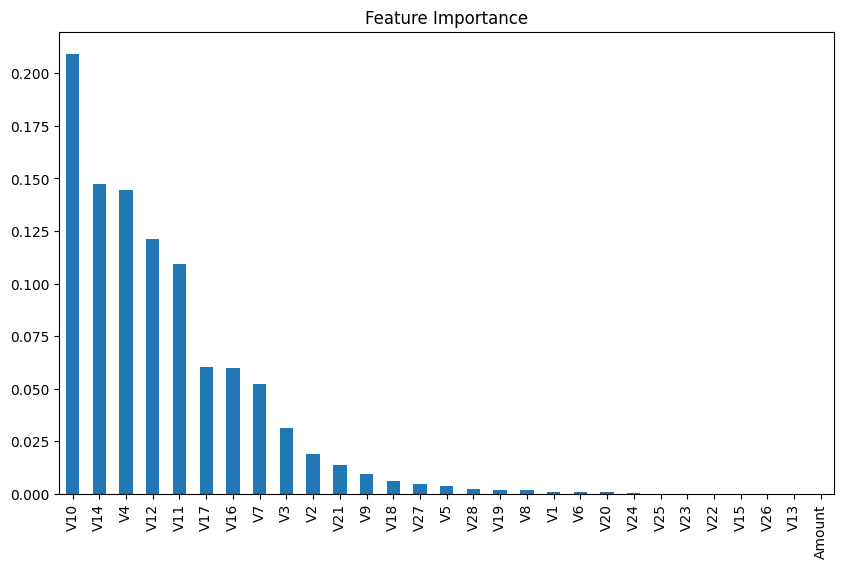

In [11]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
rf_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [ ]:
#Amount, V13, V26, V15, V22, V23, V25, V24, V20, V6, V1, V8, V19, V28, V5, V27, V18, V9, V21, V2, V3, V7, V16, V17, V11, V12, V4, V14, V10 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=15)

X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

selected_features = X.columns[rfe.support_]

print("Selected features: ", X.columns[rfe.support_])

Selected features:  Index(['V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V22', 'V23'],
      dtype='object')


In [22]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_vif = sm.add_constant(X_train_selected)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

print(vif_data.sort_values(by = "VIF", ascending=False))

   Feature       VIF
9      V12  3.916798
7      V10  3.831014
11     V16  3.692867
10     V14  3.675917
8      V11  3.254705
3       V4  2.960393
2       V3  2.847469
6       V9  2.810302
12     V18  2.740950
4       V7  2.424146
1       V1  1.976349
5       V8  1.537728
14     V23  1.390726
13     V22  1.174591
0    const  1.000003


In [18]:
from sklearn.inspection import permutation_importance

significant_features = ['V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 
                        'V12', 'V14', 'V16', 'V17', 'V18', 'V22', 'V23']

X_train_selected = X_train[significant_features]
X_test_selected = X_test[significant_features]  

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_selected, y_train)

X_test_selected = X_test[selected_features]
perm_importance = permutation_importance(lr_model, X_test_selected, y_test, scoring="roc_auc", random_state=42)

perm_df = pd.DataFrame({"Feature": selected_features, "Importance": perm_importance.importances_mean})
perm_df = perm_df.sort_values(by = "Importance", ascending=False)

print(perm_df)

   Feature  Importance
2       V4    0.046036
9      V14    0.037892
8      V12    0.022993
7      V11    0.010600
6      V10    0.010578
4       V8    0.008876
1       V3    0.005215
11     V17    0.005106
3       V7    0.002934
10     V16    0.001500
12     V18    0.001436
0       V1    0.001150
14     V23    0.000633
5       V9    0.000625
13     V22    0.000430


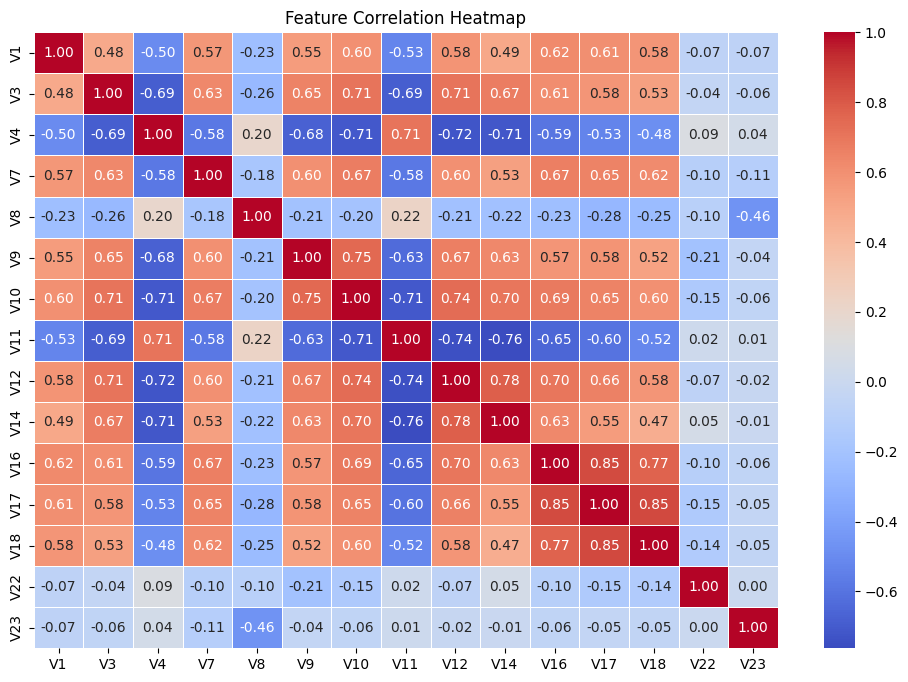

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train_selected.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
drop_feature = ['V17']
X_train_selected = X_train_selected.drop(columns=drop_feature)
X_test_selected = X_test_selected.drop(columns=drop_feature)

In [21]:
lr_model.fit(X_train_selected, y_train)
print("ROC-AUC after feature selection:", roc_auc_score(y_test, lr_model.predict_proba(X_test_selected)[:, 1]))

ROC-AUC after feature selection: 0.9924589864535904


In [24]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression on full dataset first
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)  # ✅ Make sure the model is trained first!

# Now, run Permutation Importance
perm_importance = permutation_importance(log_reg, X_test, y_test, scoring="roc_auc", random_state=42)

# Convert to DataFrame for easier visualization
perm_df = pd.DataFrame({"Feature": X_train.columns, "Importance": perm_importance.importances_mean})
perm_df = perm_df.sort_values(by="Importance", ascending=False)

# Display feature importance
print(perm_df)


   Feature    Importance
3       V4  4.481116e-02
13     V14  3.916136e-02
11     V12  2.321418e-02
10     V11  1.165310e-02
7       V8  9.490758e-03
9      V10  8.479447e-03
16     V17  5.841529e-03
2       V3  4.694808e-03
6       V7  2.647212e-03
15     V16  1.860647e-03
17     V18  1.667858e-03
0       V1  1.416230e-03
5       V6  7.414626e-04
21     V22  5.682066e-04
8       V9  5.629378e-04
22     V23  5.201969e-04
14     V15  2.297769e-04
23     V24  1.394449e-04
24     V25  1.270942e-04
20     V21  1.226268e-04
26     V27  1.178203e-04
27     V28  6.805046e-05
25     V26  4.527301e-05
19     V20  3.688408e-05
1       V2  3.039803e-05
12     V13  1.832523e-05
28  Amount  6.129769e-08
4       V5 -1.688996e-06
18     V19 -6.943711e-06


In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

rf_selected = rf_importances[rf_importances > rf_importances.median()].index.tolist()

log_reg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(log_reg, n_features_to_select=15)
rfe.fit(X_train, y_train)
rfe_selected = X_train.columns[rfe.support_].tolist()

X_train_vif = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i+1) for i in range(X_train.shape[1])]
vif_selected = vif_data[vif_data["VIF"] < 5]["Feature"].tolist()

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

perm_importance = permutation_importance(log_reg, X_test, y_test, scoring="roc_auc", random_state=42)
perm_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': perm_importance.importances_mean})
perm_selected = perm_df[perm_df["Importance"] > perm_df["Importance"].median()]["Feature"].tolist()

feature_selection_df = pd.DataFrame(index=X_train.columns)
feature_selection_df["RandomForest"] = feature_selection_df.index.isin(rf_selected).astype(int)
feature_selection_df["RFE"] = feature_selection_df.index.isin(rfe_selected).astype(int)
feature_selection_df["VIF"] = feature_selection_df.index.isin(vif_selected).astype(int)
feature_selection_df["Permutation"] = feature_selection_df.index.isin(perm_selected).astype(int)

feature_selection_df["Total Score"] = feature_selection_df.sum(axis=1)

final_selected_features = feature_selection_df[feature_selection_df["Total Score"] >= 2].index.tolist()

print("Final Selected Features:", final_selected_features)

X_train_selected = X_train[final_selected_features]
X_test_selected = X_test[final_selected_features]

log_reg.fit(X_train_selected, y_train)
print("ROC-AUC with Selected Features:", roc_auc_score(y_test, log_reg.predict_proba(X_test_selected)[:, 1]))


Final Selected Features: ['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V22', 'V23']
ROC-AUC with Selected Features: 0.9931937435003436


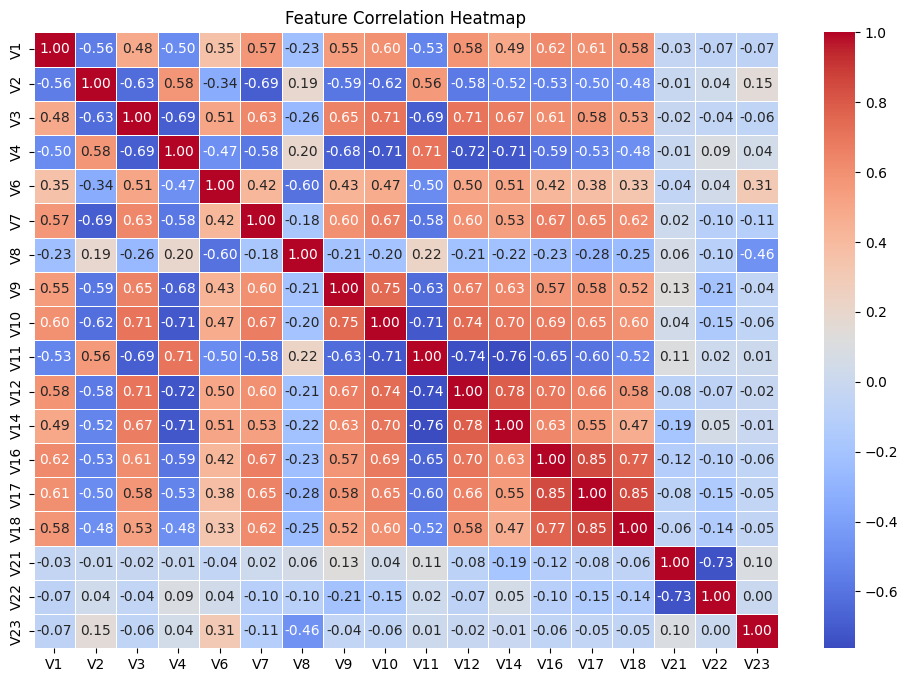

In [27]:
corr_matrix = X_train_selected.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
drop_feature = ['V9', 'V12', 'V16', 'V18']
for feature in drop_feature:
    if feature in final_selected_features:
        final_selected_features.remove(feature)
        
print(final_selected_features)

['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V11', 'V14', 'V17', 'V21', 'V22', 'V23']



🔹 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56863
           1       0.98      0.94      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

ROC-AUC Score: 0.9908944906297199


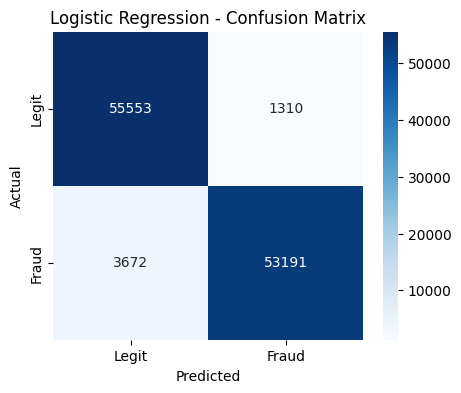


🔹 Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     56863
           1       1.00      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

ROC-AUC Score: 0.9990612745784252


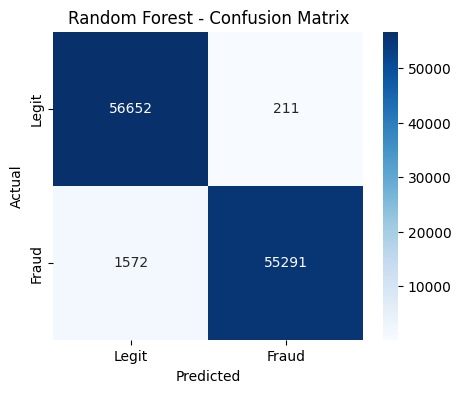


🔹 Model: XGBoost
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

ROC-AUC Score: 0.9997068176611175


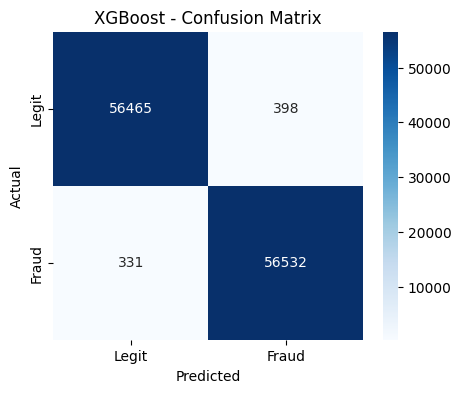

/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response

XGBoost CV ROC-AUC: nan ± nan


/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "/Users/surajmathapati/Prep/Fraud Detection/venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response

In [37]:
X_train_selected = X_train[final_selected_features]
X_test_selected = X_test[final_selected_features]

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_selected, y_train)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42, n_jobs=-1)
rf_model.fit(X_train_selected, y_train)

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train_selected, y_train)

y_pred_lr = lr_model.predict(X_test_selected)
y_pred_rf = rf_model.predict(X_test_selected)
y_pred_xgb = xgb_model.predict(X_test_selected)

models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(X_test_selected)
    y_proba = model.predict_proba(X_test_selected)[:, 1]

    print(f"\n🔹 Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
